<center><img src="data/itesm.png"/></center>
<h1 style='text-align: center;'><b>Maestría en Inteligencia Artificial Aplicada</b></h1>

<h2 style='text-align: center;'><b>Curso: Navegación autónoma</b></h2>
<h2 style='text-align: center;'><b>Tecnológico de Monterrey</b></h2>
<h2 style='text-align: center;'><b>Prof Titular y Tutor: Dr. David Antonio Torres</b></h2>
<h2 style='text-align: center;'><b>Prof Asistente: Maricarmen Vázquez Rojí</b></h2>

<h3 style='text-align: center;'><b>ALUMNO: </b>Luis Alfonso Sabanero Esquivel</h3>
<h3 style='text-align: center;'><b>MATRICULA: </b>A01273286</h3>
<h3 style='text-align: center;'><b>ALUMNO: </b>Jose Mtanous</h3>
<h3 style='text-align: center;'><b>MATRICULA: </b>A00169781</h3>
<h3 style='text-align: center;'><b>ALUMNO: </b> Guillermo Alfonso Muñiz Hermosillo</h3>
<h3 style='text-align: center;'><b>MATRICULA: </b>A01793101</h3>
<h3 style='text-align: center;'><b>ALUMNO: </b>Jorge Mariles Estrada</h3>
<h3 style='text-align: center;'><b>MATRICULA: </b>A01335663</h3>



<h2 style='text-align: center;'><b>Actividad de la Semana 05</b></h2>
<h2 style='text-align: center;'><b>Actividad 3.1 - Detección de Peatones con SVM</b></h1>
<h4 style='text-align: right;'>Mayo 2023</h4>

La explicación de esta entrega se encuentra aquí:
https://www.youtube.com/watch?v=NAQahY-G4XU

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog

In [35]:
# Utilizando la libreria de glob podemos importar nuestros archivos de imagenes utilizando comandos similares al formato UNIX
import glob
peatones = glob.glob("data/Pedestrians/*.*")
no_peatones = glob.glob("data/NoPedestrians/*.*")

In [36]:
# En esta parte imprimimos el numero de imagenes de nuestro conjunto de datos.
print(f"Imagenes con peatones: {len(peatones)}")

print(f"Imagenes sin peatones: {len(no_peatones)}")

Imagenes con peatones: 1104
Imagenes sin peatones: 1118


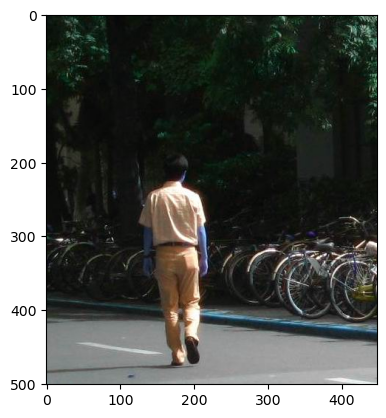

In [6]:
# Enseguida validamos alguna imagen descargada mostrandola usando la libreria matplotlib.
img_color = cv2.imread(peatones[50])
plt.imshow(img_color)

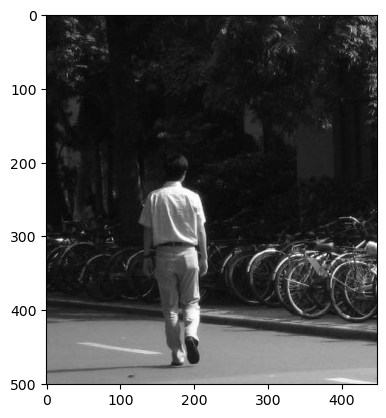

In [7]:
# Asi mismo es necesario mencionar que debemos de convertir nuestras imagener en escala de grises
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

In [8]:
# Como un ejemplo, utilizamos el algoritmo HOG (Histograma de gradientes orientado) para obtener nuestros gradientes 
features,hog_img = hog(img_gray,
                       orientations = 11,
                       pixels_per_cell = (16,16),
                       cells_per_block = (2,2),
                       transform_sqrt = False,
                       visualize = True,
                       feature_vector = True)

In [9]:
# Obtenemos nuestras features para esta imagen en particular.
features.shape

(35640,)

In [10]:
# El segundo parametro contiene la imagen HOG.
hog_img.shape

(501, 448)

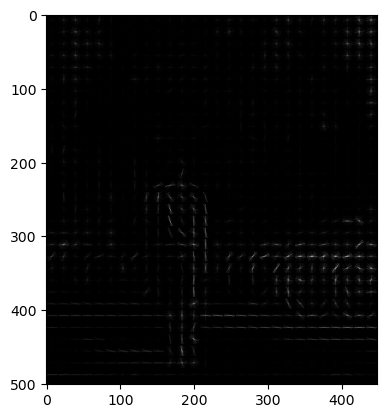

In [12]:

# Mostramos dicha imagen y podemos observar los histogramas detectados por el algoritmo.
plt.imshow(hog_img,cmap = 'gray')

In [37]:
# Para evitar la repeticion de codigo, creamos una funcion en la cual llevaremos a cabo la obtencion de caracteristicas
# Utilizando el algoritmo de HOG.

def get_hog_accum(arrayOfImages):
    # Inicializamos un acumulador de caracteristicas, el cual retornaremos al final.
    hog_accum = []

    # Recorremos cada una de las imagenas recibidas en el parametro de la funcion.
    for i in arrayOfImages:
        # Hacemos un resize de la imagen a color, con la finalidad de que el arreglo de caracteristicas e imagenes cuenten con la misma dimension.
        img_color = cv2.resize(mpimg.imread(i), (64,128), interpolation = cv2.INTER_AREA)
        # Convertimos la imagen a escala de grises.
        img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
       
        # Obtenemos las caracteristicas de la imagen utilizando el algoritmo de HOG asi como la imagen obtenida con dicho algoritmo.
        hog_feature, hog_img = hog(img_gray,
                                   orientations = 11,
                                    pixels_per_cell = (16,16),
                                    cells_per_block = (2,2),
                                    transform_sqrt = False,
                                    visualize = True,
                                    feature_vector = True)
    
        # Agregamos las caracteristicas obtenidas a nuestro acumulador.
        hog_accum.append(hog_feature)
    # Una vez concluido el proceso con todas las imagenes, retornamos todas las caracteristicas a la instancia del metodo.
    return hog_accum

In [38]:
# Asi de esta manera asignamos a esta variable el acumulador de caracteristicas para las imagenes que contienen peatones.
pedestrian_hog_accum = get_hog_accum(peatones)

# Convertimos nuestro acumulador de caracteristicas en un arreglo vertical de flotantes.
X_peaton = np.vstack(pedestrian_hog_accum).astype(np.float64)
# Creamos un arreglo de unos de la misma longitud que nuestro acumulador de caracteristicas para el conjunto de imagenes con peatones.
# Se llena con unos al asignar esta clase como la clase positiva.
y_peaton = np.ones(len(X_peaton))

In [39]:
# Asi pues observamos el numero de imagenes con el mismo numero de caracteristicas cada una
X_peaton.shape

(1104, 924)

In [40]:
# Nuestro arreglo de 1s es de la misma longitud que el numero de imagenes
y_peaton.shape

(1104,)

In [41]:
# Repetimos el proceso anterior, pero ahora utilizando el conjunto de datos de la clase negativa.
# Es decir el conjunto de imagenes que no contiene peatones.
non_pedestrian_hog_accum = get_hog_accum(no_peatones)
X_no_peaton = np.vstack(non_pedestrian_hog_accum).astype(np.float64)

# En esta ocacion es necesario crear un arreglo de 0, ya que dicho representara a la clase negativa.
y_no_peaton = np.zeros(len(X_no_peaton))

In [42]:
# Asi pues observamos el numero de imagenes sin peatones con el mismo numero de caracteristicas cada una
X_no_peaton.shape

(1118, 924)

In [43]:
# Nuestro arreglo de 0s es de la misma longitud que el numero de imagenes sin peatones.
y_no_peaton.shape

(1118,)

In [44]:
# El siguiente paso es combinar ambos conjuntos de datos en un solo conjunto para utilizarlo en el modelo.
# Utilizando el metodo vstack apilamos el conjunto de caracteristicas de ambos conjuntos de datos.
# Obteniendo la suma total de imagenes con peatones.
X = np.vstack((X_peaton,X_no_peaton))
X.shape

(2222, 924)

In [45]:
# Asi mismo es necesario combinar ambos conjuntos de variables dependientes
# Utilizando el metodo hstack creamos un arreglo con las etiquetas de ambos conjuntos de datos.
y = np.hstack((y_peaton,y_no_peaton))
y.shape

(2222,)

In [46]:

# Importamos el metodo train_test_split para dividir nuestro conjunto de datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

# Definimos un conjunto de entrenamiento del 70% del conjunto de datos contra un conjunto de prueba del 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"Forma del conjunto de Entrenamiento: {X_train.shape}")

print(f"Forma del conjunto de Prueba: {X_test.shape}")

Forma del conjunto de Entrenamiento: (1555, 924)
Forma del conjunto de Prueba: (667, 924)


In [47]:
# Es necesario importar nuestra maquina de soporte vectorial
from sklearn.svm import SVC

# Utilizando la funcion de scikitlearn entrenamos nuestro modelo utilizando nuestros conjuntos de entrenamiento.
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [48]:
# Una vez entrenado el modelo, podemos predecir los resultados en nuestro conjuntos de pruebas mediante el metodo predict de nuestro modelo.
y_predict = svc_model.predict(X_test)

<AxesSubplot:>

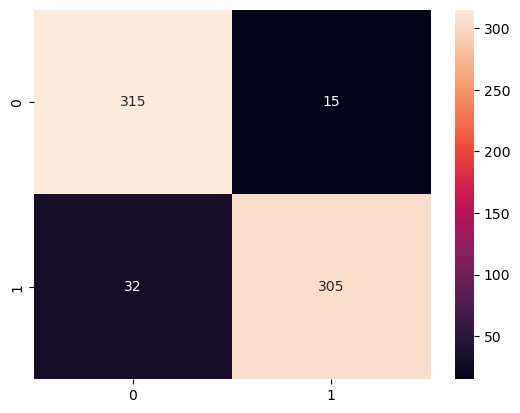

In [49]:
# Obtenidas las predicciones, es necesario crear nuestra matriz de confusion
# con el objetivo de medir el comportamiento de nuestro modelo.
from sklearn.metrics import classification_report, confusion_matrix

# Utilizando el metodo correspondiente, nuestro conjunto de prueba y las predicciones realizadas
# Obtenemos nuestra matriz. La cual podemos mostrar con un heatmat de la libreria seaborn.
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

In [50]:
# Tambien podemos obtener un reporte de clasificacion, el cual nos muestra las metricas obtenidas por nuestro modelo
# Utilizando el conjunto de pruebas y las predicciones realizadas.
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       330
         1.0       0.95      0.91      0.93       337

    accuracy                           0.93       667
   macro avg       0.93      0.93      0.93       667
weighted avg       0.93      0.93      0.93       667



In [51]:
# Podemos buscar obtener un mejor resultado mediante la utilizacion de una busqueda de mejores parametros 
# utilizando la libreria GridSearch de Scikitlean.
from sklearn.model_selection import GridSearchCV

# Definimos pues las combinaciones de los parametros que queremos evaluar en nuestro modelo.
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [10, 1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

# Entrenamos nuestra malla de busqueda utilizando nuestra maquina de soporte vectorial.
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
# Y comenzamos el entrenamiento utilizando nuestros conjuntos de entrenamiento.
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.508 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.508 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.508 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.505 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.505 total time=   0.4s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [52]:
# Una vez finalizado el entrenamiento de la malla, podemos obtener los parametros con los cuales se obtienen mejores
print(f"Mejore Parametros encontrados: {grid.best_params_}")

Mejore Parametros encontrados: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [53]:
# Para poder utilizarlo ejecutamos la linea del mejor estimador y procedemos a realizar nuestras predicciones 
# Utilizando el conjunto de pruebas.
grid.best_estimator_
grid_predictions = grid.predict(X_test)

<AxesSubplot:>

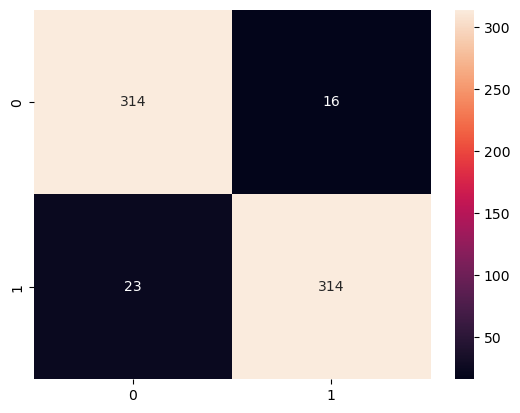

In [54]:
# Una vez obtenidas las nuevas predicciones con el modelo con mejores parametros
# Repetimos el proceso de generar nuestra matriz de confusion para observar los nuevos resultados obtenidos.
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d")

In [55]:
# Asi mismo re-imprimimos nuestro reporte de clasificacion para observar si hubo alguna mejora en nuestras metricas.
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       330
         1.0       0.95      0.93      0.94       337

    accuracy                           0.94       667
   macro avg       0.94      0.94      0.94       667
weighted avg       0.94      0.94      0.94       667

